Data set link: https://www.kaggle.com/competitions/quora-question-pairs/data?select=test.csv 

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
268733,268733,386342,386343,What are the key differences between mla and a...,What style of writing does the SAT use in the ...,0
341831,341831,32437,21952,Which are the major highways in California and...,Which are the major highways in California and...,0
133854,133854,214061,214062,What were the effects of the cold war on Cuba?,What were the effects of the Cold War on the e...,1
392825,392825,18524,22450,What are the good career option after b.tech i...,What are the career options after electrical a...,1
245618,245618,358498,305030,How do women feel about men who wear pantyhose?,Is it OK for men to wear pantyhose?,1
134989,134989,69248,128070,What are some of the best YouTube channels?,What are some best YouTube channels?,1
248689,248689,362157,362158,"Who sang the awesome ""Huppa Lumia Lumia"" song ...",Who sang the song at the end of Police Story?,0
289561,289561,101220,122806,"How can I ask someone, very politely, to reply...",What should I do if I have a very important qu...,0
328010,328010,454507,454508,Why would celery cause stomach pain?,Why do cucumbers cause stomach pain?,0
284513,284513,404769,242516,What causes the soil fertility to diminish?,What are the main causes of loss in soil ferti...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

We can drop these null value records

In [6]:
df = df.dropna()
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [7]:
df.duplicated().sum()

0

In [8]:
df["is_duplicate"].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [9]:
df["is_duplicate"].value_counts()/df["is_duplicate"].count()*100

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64

<Axes: >

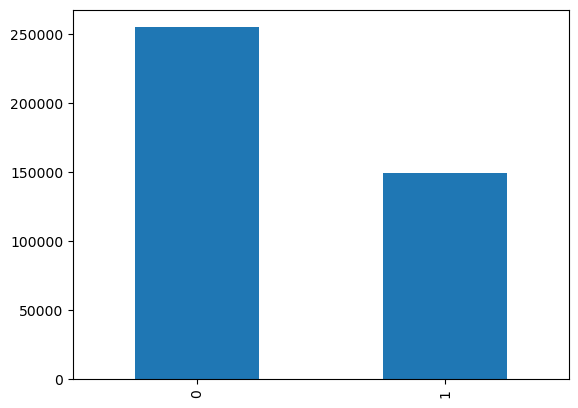

In [10]:
df["is_duplicate"].value_counts().plot(kind = "bar")

Finding number of unique questions and repeated questions

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [12]:
df["qid1"].value_counts()

8461      50
14110     48
25984     47
20628     47
1749      47
          ..
223036     1
223037     1
223039     1
223041     1
537932     1
Name: qid1, Length: 290652, dtype: int64

In [13]:
df["qid1"].tolist()

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [14]:
df["qid2"].tolist()

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,
 35

In [15]:
qid = pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

We can find out number of unique questions by making a set out of this list

In [16]:
set1 = set(qid)
len(set1)

537929

In [17]:
print("Number of unique questions", np.unique(qid).shape[0])

Number of unique questions 537929


In [18]:
x = qid.value_counts() > 1
x

2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
416446    False
416444    False
416441    False
416439    False
537933    False
Length: 537929, dtype: bool

In [19]:
print("Number of question getting repeated", x[x].shape[0])

Number of question getting repeated 111778


So, out of total 8 Lakh questions only 5 Lakh are unique and around 1 lakh something questions are having duplicates 

Repeated questions histogram

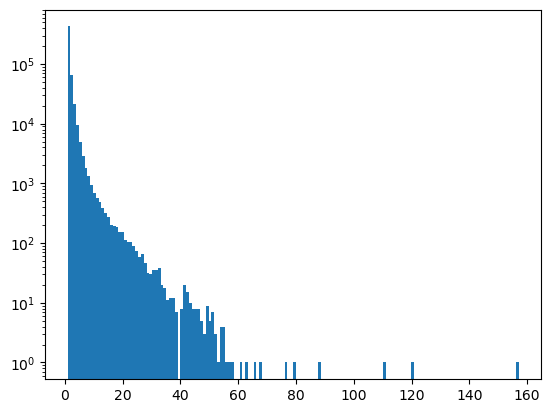

In [20]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale("log")
plt.show()

So, most of the questions are being repeated only once but some of the questions are being repeated close to 160 times

In [21]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [22]:
df["question1"][0]

'What is the step by step guide to invest in share market in india?'

In [23]:
df["question2"][0]

'What is the step by step guide to invest in share market?'

## Text Vectorization and Model Building Simple Approach

Let us apply bag of words to the two input columns question1 and question2 directly without doing any text preprocessing and we will see how the accuracy score is:

We will not take the whole dataset of 4 lakhs records, Let us take sample of 30,000 records to save training time

In [24]:
df_new = df.sample(30000)
df_new

,id,qid1,qid2,question1,question2,is_duplicate
239611,239611,351228,351229,How much money would I need to buy Knott's Ber...,How much money would you need to afford to buy...,1
332981,332981,177526,380027,Is IMS Noida a good institute for BBA?,How good is ims noida for bba?,1
290204,290204,411459,411460,Computer science MCQ book?,Why is there a correlation between liberalism ...,0
259638,259638,140852,173702,What is the most bizarre interview question yo...,What was the hardest job interview question th...,1
30471,30471,56266,56267,What is customer service?,What are customer service functions?,0
...,...,...,...,...,...,...
148522,148522,207423,234162,"What is the difference between gin, vodka, whi...",How do gin and gin rummy differ?,0
337854,337854,4187,97502,How can I stop myself from being extrovert?,How do I stop myself from being an introvert?,1
95440,95440,159167,159168,What online test series for ibps po mains?,How did you find out the chemical composition ...,0
291679,291679,413141,90735,What's the range of a very good GRE score?,What's a good GRE score?,1


Making dataframe of the two input columns

In [25]:
input_df = df_new[["question1", "question2"]]
input_df

,question1,question2
239611,How much money would I need to buy Knott's Ber...,How much money would you need to afford to buy...
332981,Is IMS Noida a good institute for BBA?,How good is ims noida for bba?
290204,Computer science MCQ book?,Why is there a correlation between liberalism ...
259638,What is the most bizarre interview question yo...,What was the hardest job interview question th...
30471,What is customer service?,What are customer service functions?
...,...,...
148522,"What is the difference between gin, vodka, whi...",How do gin and gin rummy differ?
337854,How can I stop myself from being extrovert?,How do I stop myself from being an introvert?
95440,What online test series for ibps po mains?,How did you find out the chemical composition ...
291679,What's the range of a very good GRE score?,What's a good GRE score?


### Using Bag of words text vectorization technique

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
questions_list = list(input_df["question1"]) + list(input_df["question2"])
questions_list

["How much money would I need to buy Knott's Berry Farm?",
 'Is IMS Noida a good institute for BBA?',
 'Computer science MCQ book?',
 'What is the most bizarre interview question you have ever asked?',
 'What is customer service?',
 'I have to make a website for college, what kind of website should I make?',
 'What are some of the movies from all over the world that contain nude scenes (except porn)?',
 "Who is the most interesting person you've ever sat next to on a train?",
 'How was the last night debate between Trump and Clinton?',
 'Was Karl Marx a genius?',
 'What are the requirements to become President in the United States and how are the requirements different in Russia?',
 "What is the significance of de Broglie's equation?",
 "What's the best prank you've played as an identical twin?",
 'Where can I get the best digital marketing course (online & offline) in India?',
 'Why do women generally moan much louder than men, during sex?',
 'Why are most mechanical engineers single?

We will just make 3000 dimension vector to save some memory and time (basically using the most frequent 3000 words)

In [28]:
cv = CountVectorizer(max_features=3000)

In [29]:
vectors = cv.fit_transform(questions_list).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Anyway, this will also be a sparse array only

In [30]:
len(vectors)

60000

In [31]:
vectors[0].shape

(3000,)

In [32]:
q1_arr, q2_arr = np.vsplit(vectors, 2)

In [33]:
len(q1_arr)

30000

In [34]:
len(q2_arr)

30000

In [35]:
tempdf1 = pd.DataFrame(q1_arr, index = input_df.index)
tempdf1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
239611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259638,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
tempdf2 = pd.DataFrame(q2_arr, index = input_df.index)
tempdf2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
239611,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
332981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259638,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95440,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
291679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tempdf = pd.concat([tempdf1, tempdf2], axis = 1)
tempdf

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
239611,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
332981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259638,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95440,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
291679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, this is the final input dataframe that we can use having 6000 features and 30,000 records

We can add the target column to this dataframe now

In [38]:
df_new["is_duplicate"]

239611    1
332981    1
290204    0
259638    1
30471     0
         ..
148522    0
337854    1
95440     0
291679    1
66357     0
Name: is_duplicate, Length: 30000, dtype: int64

In [39]:
tempdf["is_duplicate"] = df_new["is_duplicate"]
tempdf

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
239611,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
332981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
290204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259638,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95440,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
291679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
X = tempdf.iloc[:,:-1].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
y = tempdf.iloc[:,-1].values
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

## Trying some ML models now

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [44]:
len(X_train)

24000

In [45]:
len(X_test)

6000

 ### 1. Random Forest

Applying random forest without any hyper-parameter tuning

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7456666666666667

### 2. XGBoost

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


ModuleNotFoundError: No module named 'xgboost'

Module is missing, but we got the idea, how it is being used